# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 21 March, 2025

---


Import all the required libraries.

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Task 1: Implement Low-Pass Filtering
1. Load a grayscale image using OpenCV.
2. Apply the Fourier Transform to convert the image to the frequency domain.
3. Implement and apply the following LPFs:  
- Ideal Low-Pass Filter (ILPF)
- Butterworth Low-Pass Filter (BLPF)
- Gaussian Low-Pass Filter (GLPF)
4. Display and compare the results.

Hints:
- Use cv2.dft() and np.fft.fftshift() for Fourier Transform.
- Design different filters based on their mathematical formulas.



In [2]:
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)


(np.float64(-0.5), np.float64(411.5), np.float64(403.5), np.float64(-0.5))

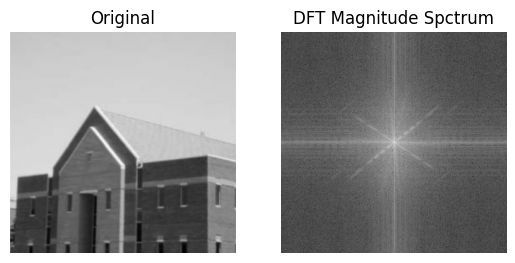

In [ ]:
# Fourier Transform
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap = 'gray')
plt.axis('off')


plt.subplot(1,2,2)
plt.title("DFT Magnitude Spctrum")
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.axis('off')


## Ideal Low-Pass Filter (ILPF)

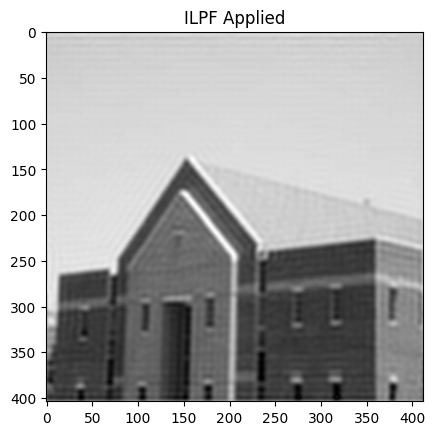

In [ ]:

def ideal_low_pass_filter(image, cutoff):
  rows, cols = image.shape
  dft = np.fft.fft2(image)
  dft_shift = np.fft.fftshift(dft)
  # Creating ILPF mask
  mask = np.zeros((rows, cols), np.uint8)
  crow, ccol = rows//2, cols//2
  cv2.circle(mask,(ccol,crow),cutoff,1,-1)

  filtered_dft = dft_shift * mask
  idft_shift = np.fft.ifftshift(filtered_dft) # Changed '-' to '=' to assign the value to idft_shift
  img_back = np.fft.ifft2(idft_shift)

  # Convert the image back to real values
  img_back = np.abs(img_back)

  return img_back

img_filtered = ideal_low_pass_filter(img,50)
plt.imshow(img_filtered, cmap='gray')
plt.title("ILPF Applied")
plt.show()

##  Butterworth Low-Pass Filter (BLPF)


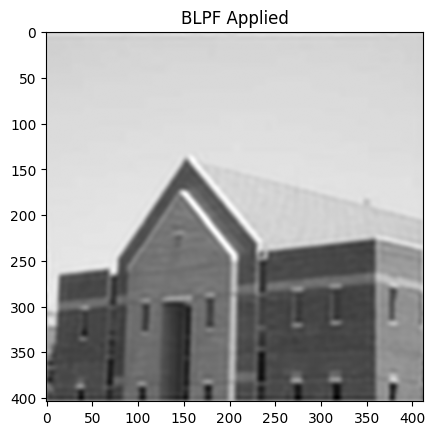

In [ ]:
def butterworth_low_pass_filter(image, cutoff,order):
  rows, cols = image.shape
  dft = np.fft.fft2(image)
  dft_shift = np.fft.fftshift(dft)
  # Creating BLPF mask
  mask = np.zeros((rows, cols), np.float32)
  crow, ccol = rows//2, cols//2

  for u in range(rows):
    for v in range(cols):
      D = np.sqrt((u-crow)**2 + (v-ccol)**2)
      mask[u,v] = 1/(1+(D/cutoff)**(2*order))

  filtered_dft = dft_shift * mask
  idft_shift = np.fft.ifftshift(filtered_dft)
  img_back = np.fft.ifft2(idft_shift).real

  return img_back

img_filtered1 = butterworth_low_pass_filter(img,50,5)
plt.imshow(img_filtered1, cmap='gray')
plt.title("BLPF Applied")
plt.show()

##  Gaussian Low-Pass Filter (GLPF)


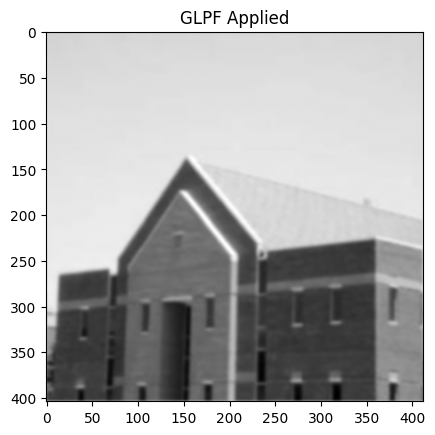

In [ ]:
def gaussian_low_pass_filter(image, cutoff):
  rows, cols = image.shape
  dft = np.fft.fft2(image)
  dft_shift = np.fft.fftshift(dft)
  mask = np.zeros((rows, cols), np.float32)
  crow, ccol = rows//2, cols//2

  for u in range(rows):
    for v in range(cols):
      D = np.sqrt((u-crow)**2 + (v-ccol)**2)
      mask[u,v] = np.exp(-(D**2)/(2*(cutoff**2)))

  filtered_dft = dft_shift * mask
  idft_shift = np.fft.ifftshift(filtered_dft)
  img_back = np.fft.ifft2(idft_shift).real

  return img_back

img_filtered2 = gaussian_low_pass_filter(img,50)
plt.imshow(img_filtered2, cmap='gray')
plt.title("GLPF Applied")
plt.show()

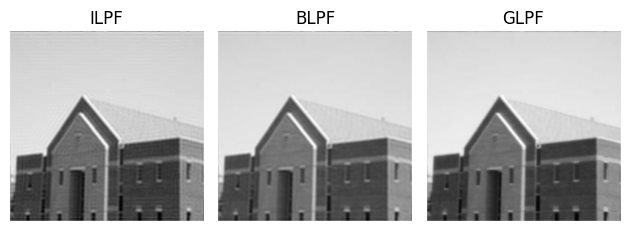

In [ ]:
# Plotting to compare results
# First subplot
plt.subplot(1, 3, 1)
plt.imshow(img_filtered,cmap='gray')
plt.title("ILPF")
plt.axis('off')

# Second subplot
plt.subplot(1, 3, 2)
plt.imshow(img_filtered1,cmap='gray')
plt.title("BLPF")
plt.axis('off')


# Third subplot
plt.subplot(1, 3, 3)
plt.imshow(img_filtered2,cmap='gray')
plt.title("GLPF")
plt.axis('off')


# Adjust layout
plt.tight_layout()
plt.show()



## Task 2: Implement High-Pass Filtering
1. Apply the Fourier Transform to an image.
2. Implement and apply the following HPFs:  
- Ideal High-Pass Filter (IHPF)
- Butterworth High-Pass Filter (BHPF)
- Gaussian High-Pass Filter (GHPF)
3. Display and analyze how each filter enhances the image.


(np.float64(-0.5), np.float64(411.5), np.float64(403.5), np.float64(-0.5))

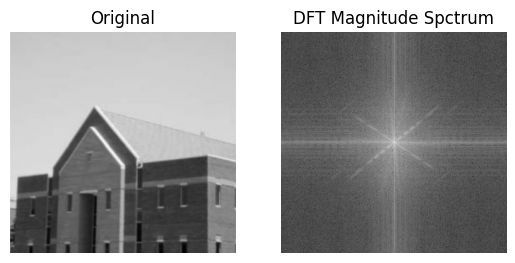

In [ ]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap = 'gray')
plt.axis('off')


plt.subplot(1,2,2)
plt.title("DFT Magnitude Spctrum")
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.axis('off')


##  Ideal High-Pass Filter (IHPF)


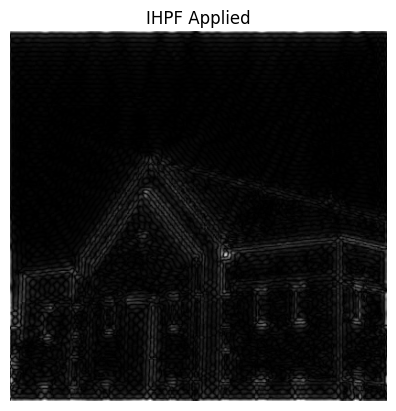

In [ ]:
def ideal_high_pass_filter(image, cutoff):
    rows, cols = image.shape
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Creating IHPF mask
    mask = np.ones((rows, cols), np.uint8)  # Start with ones instead of zeros
    crow, ccol = rows // 2, cols // 2
    cv2.circle(mask, (ccol, crow), cutoff, 0, -1)  # Invert mask by setting center to 0

    # Apply mask
    filtered_dft = dft_shift * mask
    idft_shift = np.fft.ifftshift(filtered_dft)
    img_back = np.fft.ifft2(idft_shift)
    img_back = np.abs(img_back)  # Convert to real values

    return img_back


# Apply IHPF
img_filtered3 = ideal_high_pass_filter(img, 40)

# Display result
plt.imshow(img_filtered3, cmap='gray')
plt.title("IHPF Applied")
plt.axis("off")
plt.show()

##  Butterworth High-Pass Filter (BHPF)


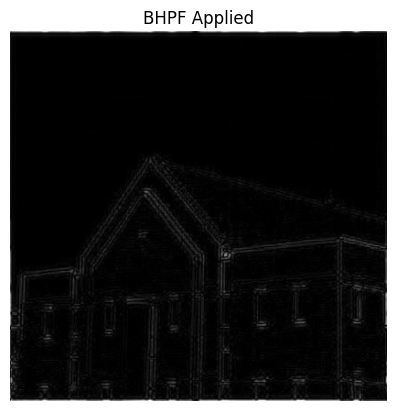

In [ ]:
def butterworth_high_pass_filter(image, cutoff, order):
    rows, cols = image.shape
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Creating BHPF mask
    mask = np.ones((rows, cols), np.float32)  # Start with ones instead of zeros
    crow, ccol = rows // 2, cols // 2

    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 - (1 / (1 + (D / cutoff) ** (2 * order)))  # Inverted BLPF mask

    # Apply mask
    filtered_dft = dft_shift * mask
    idft_shift = np.fft.ifftshift(filtered_dft)
    img_back = np.fft.ifft2(idft_shift)
    img_back = np.abs(img_back)  # Convert to real values

    return img_back


# Apply BHPF
img_filtered4 = butterworth_high_pass_filter(img, 50, 2)

# Display result
plt.imshow(img_filtered4, cmap='gray')
plt.title("BHPF Applied")
plt.axis("off")
plt.show()

##  Gaussian High-Pass Filter (GHPF)


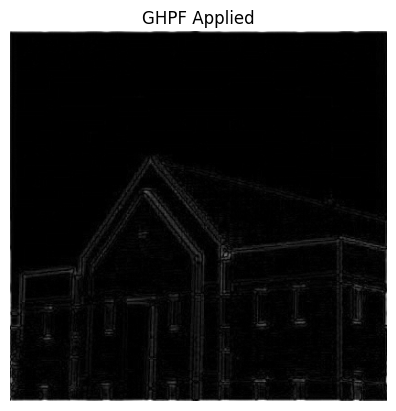

In [ ]:
def gaussian_high_pass_filter(image, cutoff):
    rows, cols = image.shape
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    # Creating GHPF mask
    mask = np.ones((rows, cols), np.float32)  # Start with ones instead of zeros
    crow, ccol = rows // 2, cols // 2

    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 - np.exp(-(D ** 2) / (2 * (cutoff ** 2)))  # Inverted Gaussian LPF

    # Apply mask
    filtered_dft = dft_shift * mask
    idft_shift = np.fft.ifftshift(filtered_dft)
    img_back = np.fft.ifft2(idft_shift)
    img_back = np.abs(img_back)  # Convert to real values

    return img_back


# Apply GHPF
img_filtered5 = gaussian_high_pass_filter(img, 50)

# Display result
plt.imshow(img_filtered5, cmap='gray')
plt.title("GHPF Applied")
plt.axis("off")
plt.show()


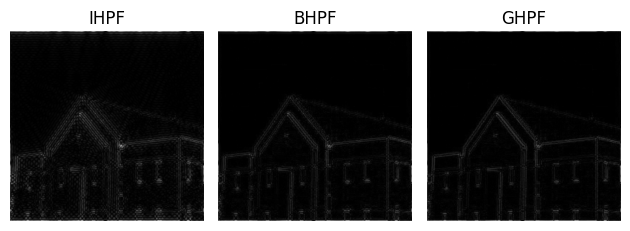

In [ ]:
# First subplot
plt.subplot(1, 3, 1)
plt.imshow(img_filtered3,cmap='gray')
plt.title("IHPF")
plt.axis('off')

# Second subplot
plt.subplot(1, 3, 2)
plt.imshow(img_filtered4,cmap='gray')
plt.title("BHPF")
plt.axis('off')


# Third subplot
plt.subplot(1, 3, 3)
plt.imshow(img_filtered5,cmap='gray')
plt.title("GHPF")
plt.axis('off')


# Adjust layout
plt.tight_layout()
plt.show()



## Task 3: Energy Retention Calculation
1. Compute energy retention before and after applying LPFs.
2. Define energy retention as:   
E= sum of |Ff|^2/|F|^2 *100

where FfF_fFf is the filtered frequency domain and FFF is the original.
3. Compare the energy retention for different LPFs.

In [10]:
# Function Definitions:
def compute_total_energy(dft):
    #Compute total energy in the frequency domain.
    return np.sum(np.abs(dft) ** 2)

def compute_energy_retention(original_dft, filtered_dft):
    #Calculate energy retention percentage.
    E_original = compute_total_energy(original_dft)
    E_filtered = compute_total_energy(filtered_dft)
    E_retention = (E_filtered / E_original) * 100
    return E_original, E_filtered, E_retention

def apply_lpf(image, mask):
    #Apply a given LPF mask to an image in the frequency domain.
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    filtered_dft = dft_shift * mask  # Apply filter
    idft_shift = np.fft.ifftshift(filtered_dft)
    img_filtered = np.fft.ifft2(idft_shift).real  # Get real part

    return img_filtered, filtered_dft

def create_ideal_lpf(rows, cols, cutoff):
    ##Create Ideal LPF mask
    mask = np.zeros((rows, cols), np.float32)
    crow, ccol = rows // 2, cols // 2
    cv2.circle(mask, (ccol, crow), cutoff, 1, -1)
    return mask

def create_butterworth_lpf(rows, cols, cutoff, order=2):
    #Create Butterworth LPF mask.
    mask = np.zeros((rows, cols), np.float32)
    crow, ccol = rows // 2, cols // 2
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (D / cutoff) ** (2 * order))
    return mask

def create_gaussian_lpf(rows, cols, cutoff):
    #Create Gaussian LPF mask.
    mask = np.zeros((rows, cols), np.float32)
    crow, ccol = rows // 2, cols // 2
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = np.exp(-(D ** 2) / (2 * (cutoff ** 2)))
    return mask


In [15]:
rows, cols = img.shape

# Compute original frequency domain
dft_original = np.fft.fftshift(np.fft.fft2(img))
E_original = compute_total_energy(dft_original)

# Create filters
cutoff = 50
ideal_mask = create_ideal_lpf(rows, cols, cutoff)
butterworth_mask = create_butterworth_lpf(rows, cols, cutoff, order=2)
gaussian_mask = create_gaussian_lpf(rows, cols, cutoff)

# Apply LPFs
img_ideal, dft_ideal = apply_lpf(img, ideal_mask)
img_butterworth, dft_butterworth = apply_lpf(img, butterworth_mask)
img_gaussian, dft_gaussian = apply_lpf(img, gaussian_mask)

# Compute energy before and after filtering
E_ideal_before, E_ideal_after, E_ideal_retention = compute_energy_retention(dft_original, dft_ideal)
E_butter_before, E_butter_after, E_butter_retention = compute_energy_retention(dft_original, dft_butterworth)
E_gauss_before, E_gauss_after, E_gauss_retention = compute_energy_retention(dft_original, dft_gaussian)

# Compute magnitude spectra for visualization
def get_magnitude_spectrum(dft):
    return np.log(1 + np.abs(dft))







In [12]:
# Function Calls:
magnitude_original = get_magnitude_spectrum(dft_original)
magnitude_ideal = get_magnitude_spectrum(dft_ideal)
magnitude_butterworth = get_magnitude_spectrum(dft_butterworth)
magnitude_gaussian = get_magnitude_spectrum(dft_gaussian)

In [13]:
# Display energy values
print(f"Original Energy: {E_original:.2f}")

print(f"\nIdeal LPF:")
print(f"  Before: {E_ideal_before:.2f}, After: {E_ideal_after:.2f}, Retention: {E_ideal_retention:.2f}%")

print(f"\nButterworth LPF:")
print(f"  Before: {E_butter_before:.2f}, After: {E_butter_after:.2f}, Retention: {E_butter_retention:.2f}%")

print(f"\nGaussian LPF:")
print(f"  Before: {E_gauss_before:.2f}, After: {E_gauss_after:.2f}, Retention: {E_gauss_retention:.2f}%")

Original Energy: 763202171624800.00

Ideal LPF:
  Before: 763202171624800.00, After: 762360842938798.00, Retention: 99.89%

Butterworth LPF:
  Before: 763202171624800.00, After: 761516381462909.00, Retention: 99.78%

Gaussian LPF:
  Before: 763202171624800.00, After: 760708804027647.62, Retention: 99.67%


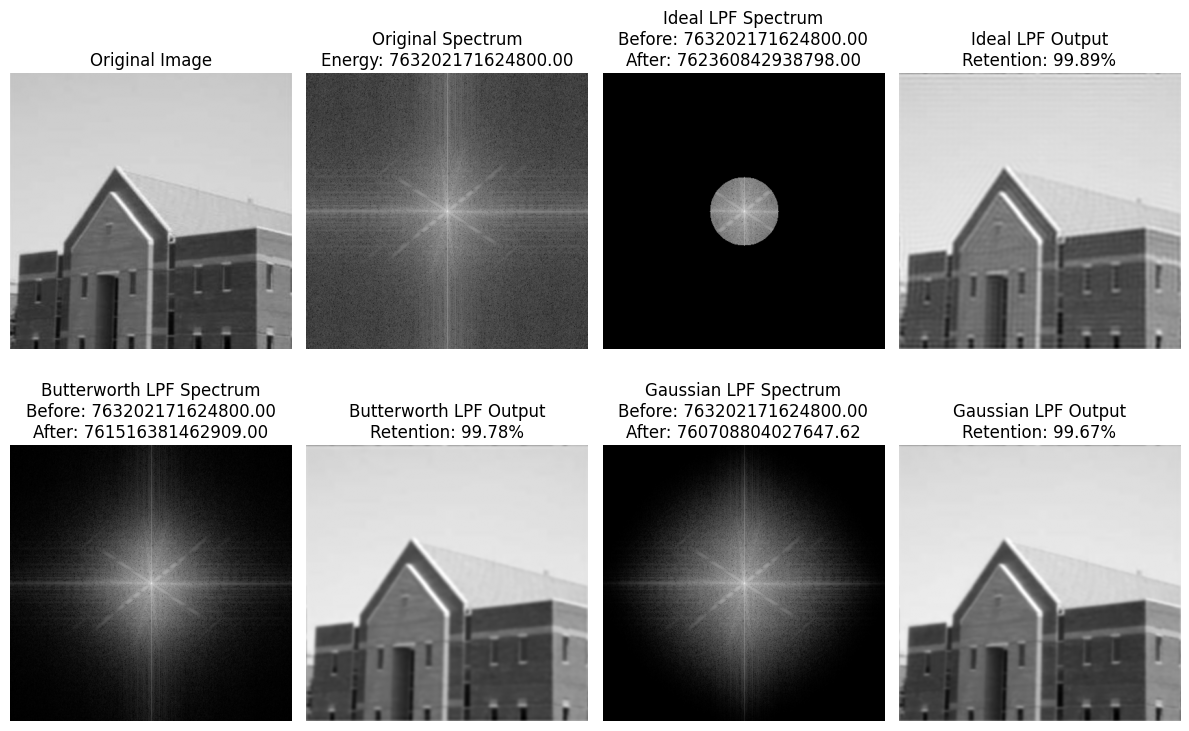

In [16]:
# Plot original and filtered frequency domain
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(magnitude_original, cmap='gray')
plt.title(f"Original Spectrum\nEnergy: {E_original:.2f}")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(magnitude_ideal, cmap='gray')
plt.title(f"Ideal LPF Spectrum\nBefore: {E_ideal_before:.2f}\nAfter: {E_ideal_after:.2f}")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(img_ideal, cmap='gray')
plt.title(f"Ideal LPF Output\nRetention: {E_ideal_retention:.2f}%")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(magnitude_butterworth, cmap='gray')
plt.title(f"Butterworth LPF Spectrum\nBefore: {E_butter_before:.2f}\nAfter: {E_butter_after:.2f}")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(img_butterworth, cmap='gray')
plt.title(f"Butterworth LPF Output\nRetention: {E_butter_retention:.2f}%")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(magnitude_gaussian, cmap='gray')
plt.title(f"Gaussian LPF Spectrum\nBefore: {E_gauss_before:.2f}\nAfter: {E_gauss_after:.2f}")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(img_gaussian, cmap='gray')
plt.title(f"Gaussian LPF Output\nRetention: {E_gauss_retention:.2f}%")
plt.axis('off')

plt.tight_layout()
plt.show()


## End
